___
# Ciência dos Dados - PROJETO 1

## Jhonata Ferreira de Souza
___

## Tipo de propaganda e público alvo mais efetivos

___
## Introdução

Nesse projeto fomos contratados por uma empresa, expecializada em venda de produtos diversos, que esta começando a trabalhar com marketing através de propagandas em sites, por ter um catalogo variado esta empresa é capaz de oferecer produtos a qualquer público. Sabendo disso eles querem que analizemos qual será o publico que mais visualizará suas propagandas e se o acesso é feito atravéz de computadores ou celulares, por região, para que possão fazer propagandas mais expecificas e direcionadas a eles.

___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\jhona\Downloads\sci-fi\CD17-master\CD17\Projeto1


### Começando a nossa Análise

Para essa análise utilizaremos o dataframe da PNAD realizada em 2015 e dela extrairemos um segundo dataframe apenas com os dados que jugamos importantes para nossa análise, que são:

    1 - Unidade da Federação (Estado)
    2 - Condição na unidade domiciliar
    3 - Nos últimos três meses, utilizou a Internet em algum local
    4 - O acesso à Internet foi feito através de microcomputador
    5 - O acesso à Internet foi feito através de telefone celular
    8 - Idade do morador na data de referência

In [34]:
#Carregamos PNAD2015
pnad2015 = pd.read_excel('PES2015.xlsx')

#Separando dados relevantes
dados_resumidos = pnad2015.loc[:,['UF','V0401','V06111','V061112','V061113','V8005']]

Agora iremos filtrar e organizar os nossos dados de maneira mais vizivel e apresentavel e tambem criar uma nova coluna acrescentando a Região onde o entrevistado mora a nossa lista de dados

In [38]:
#Definindo a coluna UF como categoria e trocando os números pelos respectivos nomes dos estados
dados_resumidos.UF = dados_resumidos.UF.astype('category')
dados_resumidos.UF.cat.categories = (['Rondônia','Acre','Amazonas','Roraima','Pará','Amapá','Tocantins','Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia','Minas Gerais','Espírito Santo','Rio de Janeiro','São Paulo','Paraná','Santa Catarina','Rio Grande do Sul','Mato Grosso do Sul','Mato Grosso','Goiás','Distrito Federal'])

In [39]:
#Trocando valores númericos pela condição a qual representa
dados_resumidos.V0401 = dados_resumidos.V0401.astype('category')
dados_resumidos.V0401.cat.categories = (['Pessoa de referência', 'Cônjuge', 'Filho', 'Outro parente', 'Agregado', 'Pensionista', 'Empregado doméstico', 'Parente do empregado doméstico'])

In [41]:
#Trocando valores númericos por Sim, Não e Não respondeu
dados_resumidos.V06111.fillna(0, inplace=True)
dados_resumidos.V06111 = dados_resumidos.V06111.astype('category')
dados_resumidos.V06111.cat.categories = (['Não respondeu', 'Sim', 'Não'])

In [37]:
#Trocando valores númericos por Sim, Não e Não respondeu
dados_resumidos.V061112.fillna(0, inplace=True)
dados_resumidos.V061112 = dados_resumidos.V061112.astype('category')
dados_resumidos.V061112.cat.categories = (['Não respondeu', 'Sim', 'Não'])

In [42]:
#Trocando valores númericos por Sim, Não e Não respondeu
dados_resumidos.V061113.fillna(0, inplace=True)
dados_resumidos.V061113 = dados_resumidos.V061113.astype('category')
dados_resumidos.V061113.cat.categories = (['Não respondeu', 'Sim', 'Não'])

In [43]:
#Criando a coluna Região
dados_resumidos.loc[(dados_resumidos.UF=='Rondônia') | (dados_resumidos.UF=='Acre') | (dados_resumidos.UF=='Amazonas') | (dados_resumidos.UF=='Roraima') | (dados_resumidos.UF=='Pará') | (dados_resumidos.UF=='Amapá') | (dados_resumidos.UF=='Tocantins'),'Regiao'] = 'Norte'
dados_resumidos.loc[(dados_resumidos.UF=='Maranhão') | (dados_resumidos.UF=='Piaui') | (dados_resumidos.UF=='Caerá') | (dados_resumidos.UF=='Rio Grande do Norte') | (dados_resumidos.UF=='Paraíba') | (dados_resumidos.UF=='Pernambuco') | (dados_resumidos.UF=='Alagoas') | (dados_resumidos.UF=='Sergipe') | (dados_resumidos.UF=='Bahia'),'Regiao'] = 'Nordeste'
dados_resumidos.loc[(dados_resumidos.UF=='Minas Gerais') | (dados_resumidos.UF=='Espirito Santo') | (dados_resumidos.UF=='Rio de Janeiro') | (dados_resumidos.UF=='São Paulo'),'Regiao'] = 'Sudeste'
dados_resumidos.loc[(dados_resumidos.UF=='Paraná') | (dados_resumidos.UF=='Santa Catarina') | (dados_resumidos.UF=='Rio Grande do Sul'),'Regiao'] = 'Sul'
dados_resumidos.loc[(dados_resumidos.UF=='Mato Grosso do Sul') | (dados_resumidos.UF=='Mato Grosso') | (dados_resumidos.UF=='Goiás') | (dados_resumidos.UF=='Distrito Federal'),'Regiao'] = 'Centroeste'

Com isso obtemos um dataframe quase completamente "traduzido" mas por enquanto manteremos os nomes das colunas como códigos para facilitar a escrita dos códigos durante a análise

In [44]:
dados_resumidos

,UF,V0401,V06111,V061112,V061113,V8005,Regiao
0,Rondônia,Pessoa de referência,Sim,Não,Sim,23,Norte
1,Rondônia,Pessoa de referência,Sim,Sim,Sim,23,Norte
2,Rondônia,Pessoa de referência,Sim,Sim,Sim,35,Norte
3,Rondônia,Cônjuge,Sim,Sim,Sim,34,Norte
4,Rondônia,Filho,Sim,Sim,Não,11,Norte
5,Rondônia,Filho,Não respondeu,Não respondeu,Não respondeu,7,Norte
6,Rondônia,Filho,Não respondeu,Não respondeu,Não respondeu,4,Norte
7,Rondônia,Agregado,Sim,Sim,Sim,18,Norte
8,Rondônia,Pessoa de referência,Não,Não respondeu,Não respondeu,46,Norte
9,Rondônia,Outro parente,Não,Não respondeu,Não respondeu,81,Norte


### Cruzando dados de tabelas e averiguando os dados observados

Agora iremos cruzar os dados da coluna 2 com os dados da 3 para obtermos a porcentagem de pessoas por status que ultilizaram a internet recentemente

In [45]:
usou_internet = (pd.crosstab(dados_resumidos.V0401, dados_resumidos.V06111 , margins=True, rownames=['Condição na Unidade Familiar'], colnames=['Usou internet'], normalize='index')*100).round(decimals=0)

In [46]:
usou_internet

Usou internet,Não respondeu,Sim,Não
Condição na Unidade Familiar,,,
Pessoa de referência,0.0,47.0,53.0
Cônjuge,0.0,52.0,48.0
Filho,30.0,53.0,17.0
Outro parente,29.0,42.0,30.0
Agregado,8.0,58.0,34.0
Pensionista,2.0,78.0,20.0
Empregado doméstico,0.0,50.0,50.0
Parente do empregado doméstico,40.0,48.0,12.0
All,14.0,50.0,37.0


Agora cruzaremos os dados da coluna 2 com os da coluna 7

In [47]:
re = (pd.crosstab(dados_resumidos.Regiao, dados_resumidos.V0401, margins=True, rownames=['Região'], colnames=['Condição na Unidade Familiar'], normalize='index')*100).round(decimals=0)

In [48]:
re

Condição na Unidade Familiar,Pessoa de referência,Cônjuge,Filho,Outro parente,Agregado,Pensionista,Empregado doméstico,Parente do empregado doméstico
Região,,,,,,,,
Centroeste,34.0,21.0,34.0,10.0,1.0,0.0,0.0,0.0
Nordeste,32.0,20.0,36.0,11.0,1.0,0.0,0.0,0.0
Norte,29.0,19.0,38.0,13.0,1.0,0.0,0.0,0.0
Sudeste,34.0,21.0,35.0,9.0,0.0,0.0,0.0,0.0
Sul,36.0,23.0,33.0,8.0,0.0,0.0,0.0,0.0
All,33.0,21.0,35.0,10.0,1.0,0.0,0.0,0.0


Agora observaremos essas duas tabelas juntamente com a coluna 2 para tirarmos nossas primeiras conclusões

Mas para uma visualização mais limpa do nosso conteudo faremos a observação grafica deles

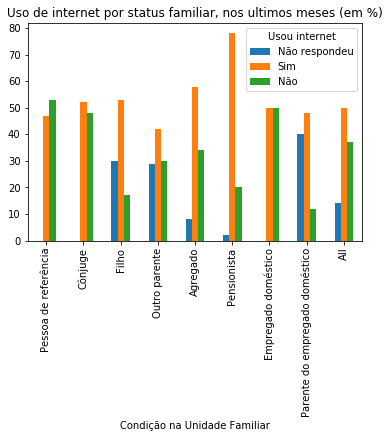

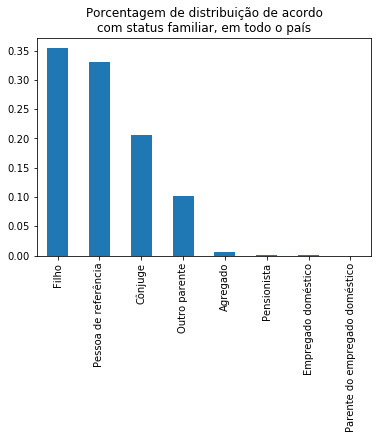

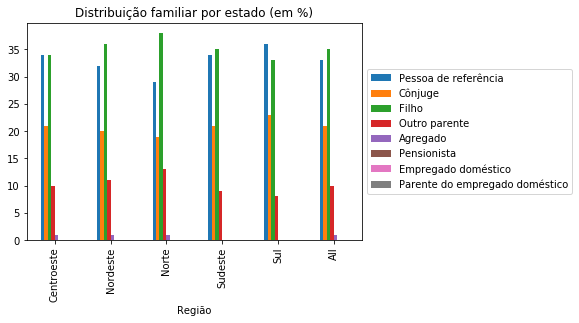

In [51]:
plot = usou_internet.plot(kind='bar', title='Uso de internet por status familiar, nos ultimos meses (em %)')

plt.show()


plot = dados_resumidos.V0401.value_counts(True).plot(kind='bar', title = 'Porcentagem de distribuição de acordo\ncom status familiar, em todo o país')

plt.show()

re.plot(kind='bar', title='Distribuição familiar por estado (em %)')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams.update({'font.size': 10})

plt.show()

Ao observarmos o grafico de "uso de internet" (Primeiro grafico) notamos que com excessão das pessoas de referenência e das empregadas domésticas as pessoas detentoras dos outros status em sua maioria utilizaram a internet frequentemente.

E ao observarmos os outros dois graficos percebemos que os detentores do status de "Filhos" são predominantes em termons gerais e regionais em população, com excesão das Regiões Centroeste e Sul, e mesmo nas regiões em que os filhos não são a maioria eles ainda assim são uma alta parte da população

##### Então podemos concluir que os filhos são os maiores ultilizadores de internet no país.

## Análize dos filhos

Para começar nossa análise sobre os filhos vamos separar apenas os que ultilizam internet

In [52]:
filhoes = dados_resumidos.loc[(dados_resumidos.V0401 =='Filho')]
filhoes = filhoes.loc[(filhoes.V06111 != 'Não respondeu')]
filhoes = filhoes.loc[(filhoes.V06111 != 'Não')]
filhoes

,UF,V0401,V06111,V061112,V061113,V8005,Regiao
4,Rondônia,Filho,Sim,Sim,Não,11,Norte
12,Rondônia,Filho,Sim,Não,Sim,24,Norte
18,Rondônia,Filho,Sim,Não,Sim,16,Norte
19,Rondônia,Filho,Sim,Sim,Sim,11,Norte
23,Rondônia,Filho,Sim,Sim,Sim,16,Norte
26,Rondônia,Filho,Sim,Sim,Sim,30,Norte
32,Rondônia,Filho,Sim,Não,Sim,10,Norte
33,Rondônia,Filho,Sim,Não,Sim,22,Norte
38,Rondônia,Filho,Sim,Sim,Sim,24,Norte
41,Rondônia,Filho,Sim,Sim,Não,21,Norte


Agora vamos observar qual a idade dessas pessoas consideradas filhos

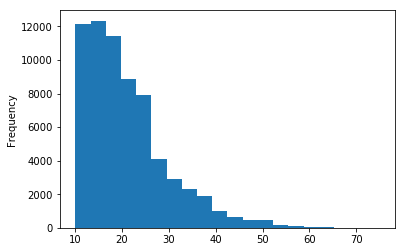

In [53]:
plot = filhoes.V8005.plot.hist(bins=20, normed= False)

#### Podemos observar que a maioria dessas pessoas tem entre  10 e 25 anos

Agora vamos cruzar tabelas para observar o que esses filhos mais utilizam, celulares ou computadores

In [55]:
filhoes_micro= (pd.crosstab(filhoes.Regiao, filhoes.V061112, margins=True, rownames=['Região'], colnames=['Usou Microcomputador']))
filhoes_micro = filhoes_micro.drop('All')
filhoes_celular= (pd.crosstab(filhoes.Regiao, filhoes.V061113, margins=True, rownames=['Região'], colnames=['Usou Celular']))
filhoes_celular = filhoes_celular.drop('All')

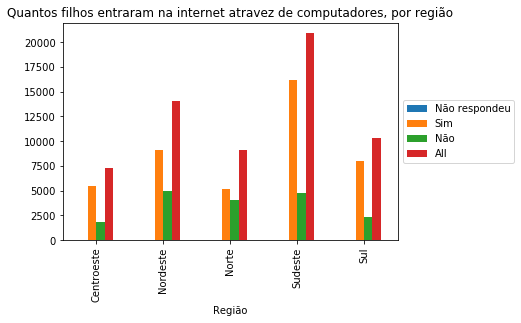

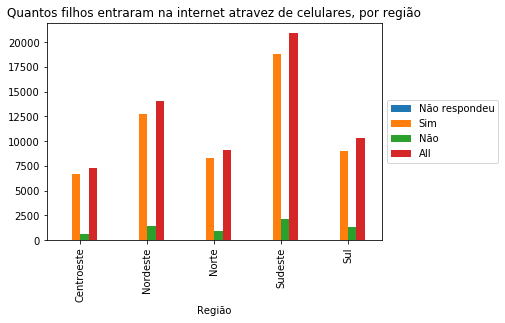

In [58]:
plot = filhoes_micro.plot(kind='bar', title = 'Quantos filhos entraram na internet atravez de computadores, por região')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams.update({'font.size': 10})
plt.show()

plot = filhoes_celular.plot(kind='bar', title = 'Quantos filhos entraram na internet atravez de celulares, por região')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams.update({'font.size': 10})
plt.show()

___
## Conclusão 

Descreva aqui suas conclusões!

### Propaganda para filhos, entre 10 e 25 anos

## Por região:

### Centroeste : Celular

### Nordeste : Celular

### Norte : Celular

### Sudeste : C

### Sul : 